# Постановка задачи

## $k$-я порядковая статистика

__Вход__: массив $A$.

__Выход__: $k$-й элемент упорядоченного по неубыванию массива (то есть $A'[k]$).

# Линейное в среднем время

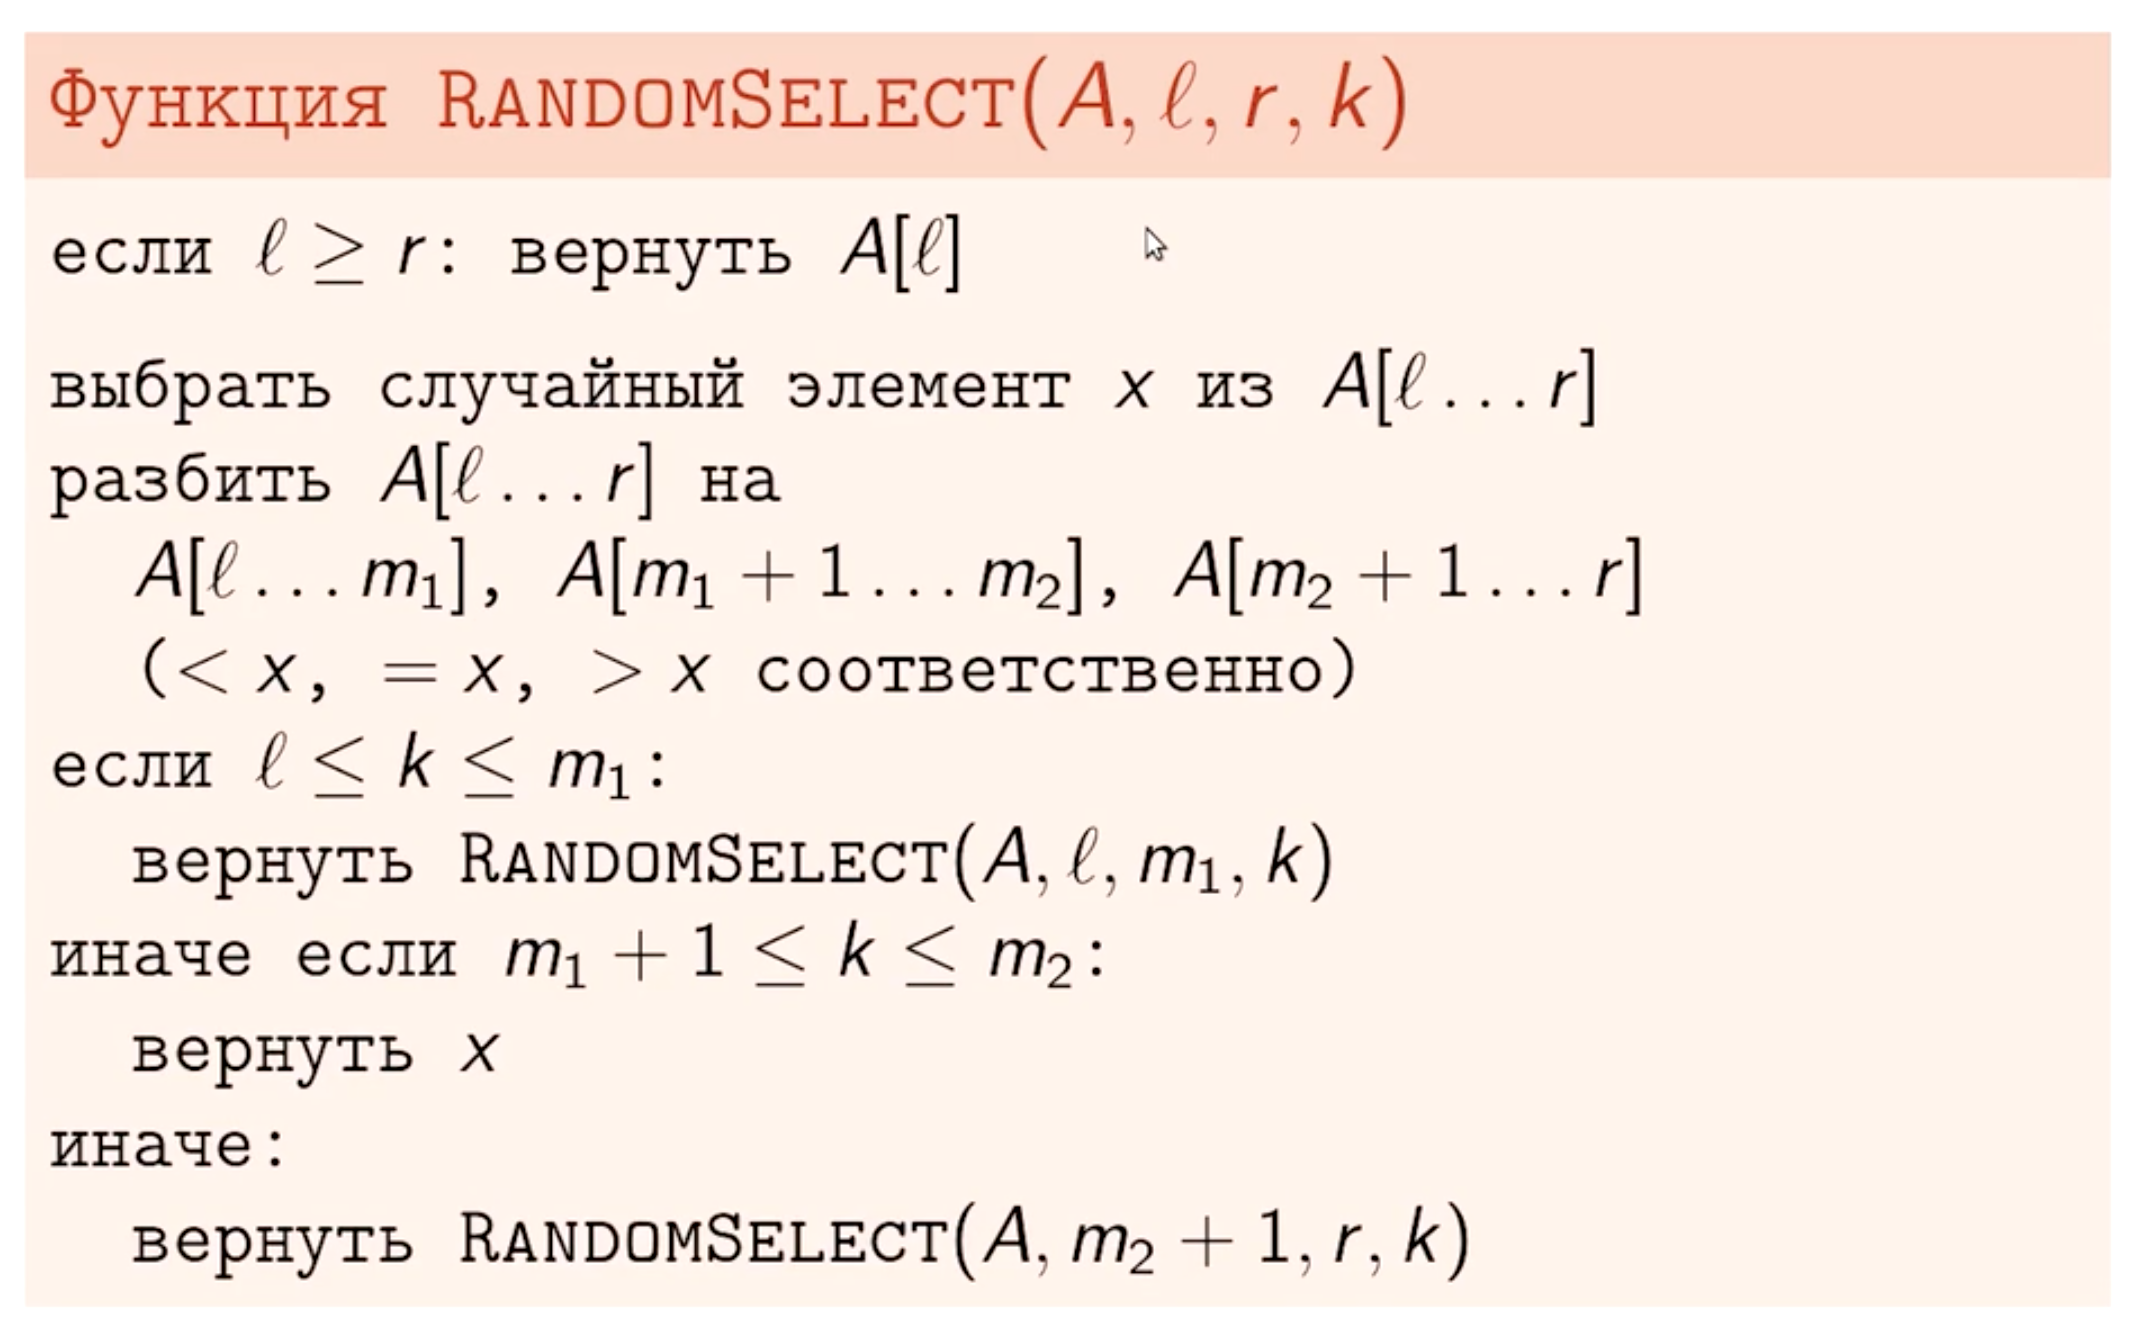

In [2]:
from IPython.display import Image
Image(filename='images/Порядковые статистики/random_select_1.png')

In [21]:
def partition_3(a, l, r):
    x = a[l]
    lt = l
    gt = r
    i = l + 1
    while i <= gt:
        if a[i] < x:
            a[lt], a[i] = a[i], a[lt]
            lt += 1
            i += 1
        elif a[i] > x:
            a[i], a[gt] = a[gt], a[i]
            gt -= 1
        else:
            i += 1
            
    return lt, gt
    

def random_select(a, l, r, k):
    if l >= r:
        return a[l]
    
    x = a[l] # Пока без случайности
    lt, gt = partition_3(a, l, r)
    
    if l <= k <= lt:
        return random_select(a, l, lt, k)
    elif lt + 1 <= k <= gt:
        return x
    else:
        return random_select(a, gt + 1, r, k)
    
# a = [7, 6, 7, 4, 3, 5, 3, 3, 3, 5, 6, 5, 6, 7, 7, 7, 4]  
a = [78, 41, 4, 27, 3, 27, 8, 39, 19, 34, 6, 41, 13, 52, 16]
b = sorted(a)
print(b)
print(any([b[i] == random_select(a, 0, len(a) - 1, i) for i in range(len(a))]))

[3, 4, 6, 8, 13, 16, 19, 27, 27, 34, 39, 41, 41, 52, 78]
True


# Вспомогательная лемма

## Лемма

Математическое ожидание количества подбрасываний монетки до первой решки (включительно) равно 2.

__Доказательство__.

- $E = \frac{1}{2} \cdot 1 + \frac{1}{2} \cdot (1 + E)$, откуда $E = 2$

- или по определению: $$E = \sum \limits_{i=1}^{\infty} i \cdot \frac{1}{2^i} = 2$$

# Лемма

Среднее время работы алгоритма RandomSelect есть $O(n)$.

# Задача

Предположим, что в нашем распоряжении есть алгоритм, который за линейное время находит медиану массива. Алгоритм не изменяет массив и выдает индекс ячейки исходного массива, в которой стоит медиана. Покажите, как использовать этот алгоритм, чтобы за линейное же время найти любую заданную порядковую статистику массива.

__Решение__.

$k$ - искомая статистика, $n/2$ - медиана 
- Узнаем длину массива
- Если искомая статистика меньше медианы $(k<n/2)$, пройдем по массиву и найдем минимум
- Если искомая статистика больше медианы $(k>n/2)$, пройдем по массиву и найдем максимум
- $k<n/2$: включим в массив столько повторяющихся значений минимума, чтобы $k$ стала медианой $(n-2k+1)$
- $k>n/2$: включим в массив столько повторяющихся значений максимума, чтобы $k$ стала медианой $(2k-n-1)$
- Найдем медиану

Время работы: $T(n)=Θ(1)+O(n)+c \cdot Θ(1)+O(n) = O(n)$